Compiling model...
Building feed-forward neural network...
'build' took 0.113746 s

'compile' took 1.205656 s

Training model...

Step      Train loss    Test loss     Test metric
0         [1.21e-01]    [1.21e-01]    []  
5000      [5.58e-10]    [5.58e-10]    []  
10000     [2.70e-11]    [2.70e-11]    []  
15000     [4.45e-09]    [4.45e-09]    []  
20000     [7.49e-11]    [7.49e-11]    []  
25000     [1.62e-09]    [1.62e-09]    []  
30000     [3.98e-11]    [3.98e-11]    []  
35000     [5.02e-13]    [5.02e-13]    []  
40000     [7.57e-12]    [7.57e-12]    []  
45000     [2.67e-11]    [2.67e-11]    []  

Best model at step 35000:
  train loss: 5.02e-13
  test loss: 5.02e-13
  test metric: []

'train' took 300.493582 s



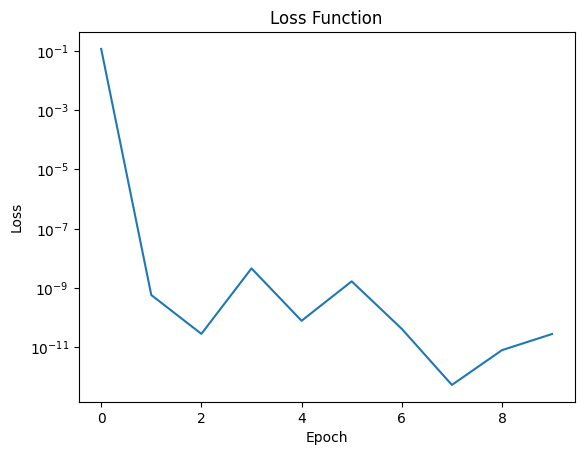

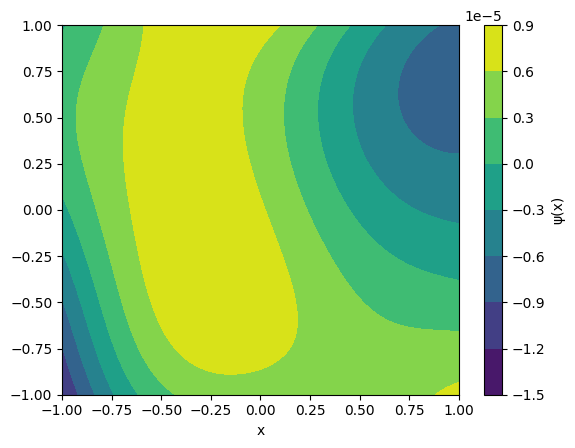

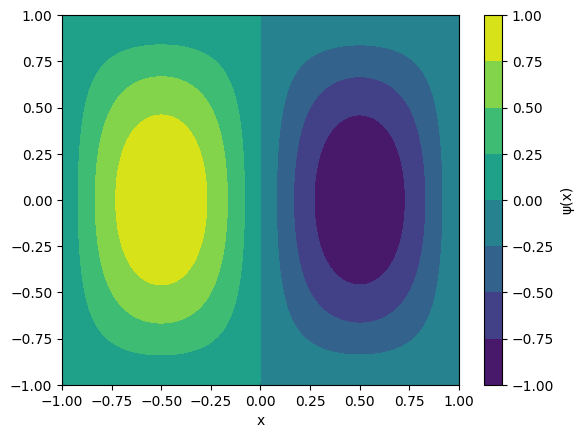

In [38]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import paddle.fluid as fluid

n1 = 1
n2 = 2

def pde(x, y, n1, n2):
    u_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    v_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)

    return 0.5*(u_xx + v_xx) + (n1**2 + n2**2)*np.pi**2/8 * y
    
def boundary_conditions(x, on_boundary):
    return on_boundary and dde.utils.isclose(np.abs(x[0]), 1) or dde.utils.isclose(np.abs(x[1]), 1)

def exact_sol(x_grid, y_grid, n1, n2):
    return np.sin(n1*np.pi*(x_grid + 1)/2) * np.sin(n2*np.pi*(y_grid + 1)/2)

# Generate grid points for visualization
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
x_grid, y_grid = np.meshgrid(x, y)
points = np.vstack((x_grid.ravel(), y_grid.ravel())).T

exact_result =  exact_sol(x_grid, y_grid, n1, n2)

geom = dde.geometry.Rectangle([-1, -1], [1, 1])
bc = dde.DirichletBC(geom, lambda x: 0, boundary_conditions)
data = dde.data.PDE(geom, pde, bc, num_boundary=3500,  num_test=30000, train_distribution="uniform")
net = dde.nn.FNN([2] + [50]*15 + [1], "tanh", kernel_initializer="Glorot normal")
model = dde.Model(data, net)
model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=45000, display_every=5000)

plt.figure()
plt.semilogy(losshistory.loss_test)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Function")
plt.show()

# Calculate the exact solution on the grid
# Predict the solution using the trained model
pred_sol = model.predict(points)
pred_sol_grid = np.reshape(pred_sol, x_grid.shape)

# Plot the exact solution
plt.figure()
plt.contourf(x_grid, y_grid, pred_sol_grid.T, cmap='viridis')
plt.colorbar(label='ψ(x)')
plt.xlabel('x')
plt.ylabel
plt.show()

plt.figure()
plt.contourf(x_grid, y_grid, exact_sol(x_grid, y_grid, n1, n2).T, cmap='viridis')
plt.colorbar(label='ψ(x)')
plt.xlabel('x')
plt.ylabel
plt.show()


